In [1]:
import os
import numpy as np
import pandas as pd
from Bio.PDB.Polypeptide import three_to_index
from Bio.PDB.Polypeptide import one_to_three

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.rcParams['figure.figsize'] = np.array([10,6.180])    #golden ratio
plt.rcParams['figure.facecolor'] = 'w'

In [9]:
def get_filtered_B_inv_lambda_and_P(filtered_lamb, cutoff_mode, P, method='extend_all_after_first_noisy_mode'):
    if method == 'zero_all_after_first_noisy_mode':
        filtered_lamb_inv = 1 / filtered_lamb
        # for "zeroing unreliable eigenvalues"
        filtered_lamb_inv[cutoff_mode:] = 0.0
        filtered_B_inv = np.dot(
            P, np.dot(np.diag(filtered_lamb_inv), np.linalg.inv(P)))
        filtered_lamb = 1 / filtered_lamb_inv
    if method == 'extend_all_after_first_noisy_mode':
        # for "extending lowest reliable eigenvalue"
        filtered_lamb[cutoff_mode:] = filtered_lamb[cutoff_mode - 1]
        filtered_B_inv = np.dot(
            P, np.dot(np.diag(1 / filtered_lamb), np.linalg.inv(P)))

    return filtered_B_inv, filtered_lamb, P


def sort_eigenvalues_and_eigenvectors(eigenvalues, eigenvectors):
    idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    return eigenvalues, eigenvectors



In [81]:
pre = "/Users/weilu/Research/server/aug_2020/cluster20_shuffle_optimization/optimization_decoyN2000/combined_gammas/"
pp = "aug07"

A_name = pp + "_A"
B_name = pp + "_B"

A = np.loadtxt(pre+A_name)
B = np.loadtxt(pre+B_name)


half_B_name = pp + "_half_B"
half_B = np.loadtxt(pre+half_B_name)
other_half_B_name = pp + "_other_half_B"
other_half_B = np.loadtxt(pre+other_half_B_name)
std_half_B_name = pp + "_std_half_B"
std_half_B = np.loadtxt(pre+std_half_B_name)


# pre = "/Users/weilu/Research/server/april_2019/"
# location = pre + f"../../phis/{pp}_phi_decoy_summary.txt"
location = pre + pp + "_A_prime"
A_prime = np.loadtxt(location)

In [ ]:
gamma = np.loadtxt("/Users/weilu/Research/server/jul_week1_2020/membrane_protein_structure_prediction/cluster20.dat")

In [327]:
c = -200
cutoff = 420

# B = B_only_diag
B = B_original
A = A_original
lamb, P = np.linalg.eig(B)
lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)
filtered_lamb = np.copy(lamb)
cutoff_mode = cutoff
filtered_B_inv, filtered_lamb, P = get_filtered_B_inv_lambda_and_P(filtered_lamb,
                                                                   cutoff_mode, P)
filtered_gamma = np.dot(filtered_B_inv, A)
filtered_B = np.linalg.inv(filtered_B_inv)

B_inv = filtered_B_inv
lambda_2 = (A_prime.dot(B_inv).dot(A) - c) / (A_prime.dot(B_inv).dot(A_prime))
gamma_new = B_inv.dot(A-A_prime*lambda_2)
gamma_original_B = gamma_new

In [331]:
# inversion caused difference is minor.
B_inv = np.linalg.inv(B)
lambda_2 = (A_prime.dot(B_inv).dot(A) - c) / (A_prime.dot(B_inv).dot(A_prime))
gamma_new = B_inv.dot(A-A_prime*lambda_2)
# gamma_original_B = gamma_new

abs(gamma_original_B- gamma_new).sum()

1.1080203421443002e-09

In [82]:
A_original = A

In [178]:
from cvxopt import matrix, solvers
Q = 2*matrix(B_original)
p = matrix(np.zeros(420))
G = matrix([[]])
h = matrix([])
A = matrix(A_original, (1,420))
b = matrix(1.0)
sol=solvers.qp(Q, p, A, b)

     pcost       dcost       gap    pres   dres
 0:  2.4937e-02 -2.7708e-02  5e-02  0e+00  4e+00
 1:  2.4657e-02  2.4077e-02  6e-04  0e+00  3e-01
 2:  6.1254e-04 -8.8635e-03  9e-03  6e-17  3e-16
 3:  4.0251e-07 -2.1191e-04  2e-04  5e-16  3e-17
 4:  4.0251e-11 -2.1151e-06  2e-06  2e-16  8e-19
 5:  4.0251e-15 -2.1151e-08  2e-08  5e-16  1e-20
Optimal solution found.


In [179]:
x = sol["x"]
a =  (-np.array(x)*1e6).reshape(420)
b = ( A_original.dot(np.linalg.inv(B_original)) )

abs(a - b*((a/b).mean())).sum()

7.819568415359541e-11

In [151]:
from cvxopt import matrix, solvers
Q = 2*matrix(B_original)
p = matrix(np.zeros(420))

G = matrix(-A_original, (1,420))
h = matrix(1.0)
A = matrix([[]])
b = matrix([])

sol=solvers.qp(Q, p, G, h)

     pcost       dcost       gap    pres   dres
 0:  2.4937e-02 -2.7708e-02  5e-02  0e+00  4e+00
 1:  2.4657e-02  2.4077e-02  6e-04  0e+00  3e-01
 2:  6.1254e-04 -8.8635e-03  9e-03  6e-17  3e-16
 3:  4.0251e-07 -2.1191e-04  2e-04  5e-16  3e-17
 4:  4.0251e-11 -2.1151e-06  2e-06  2e-16  8e-19
 5:  4.0251e-15 -2.1151e-08  2e-08  5e-16  1e-20
Optimal solution found.


In [152]:
x = sol["x"]
a =  (-np.array(x)*1e6).reshape(420)
b = ( A_original.dot(np.linalg.inv(B_original)) )

abs(a - b*((a/b).mean())).sum()

7.819568415359541e-11

In [386]:
from cvxopt import matrix, solvers
Q = 2*matrix(B_original)
p = matrix(np.zeros(420))
G = matrix(-A_original, (1,420))
# h = matrix(np.array([-0.01]), (1, 1), 'd')
h = matrix(-30.99892)
A = matrix(A_prime, (1,420))
b = matrix(-100, (1, 1), 'd')
sol=solvers.qp(Q, p, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0:  2.3963e+01  2.6626e+01  2e+00  8e-02  7e-14
 1:  2.6677e+01  2.6700e+01  2e-02  8e-04  6e-15
 2:  2.6700e+01  2.6700e+01  2e-04  8e-06  6e-15
 3:  2.6700e+01  2.6700e+01  2e-06  8e-08  7e-15
Optimal solution found.


In [402]:
B_matrix

array([[-1.27362914, -2.19855106,  0.06707355, ...,  0.63197859,
        -0.52336682,  0.41074216],
       [-1.32916451, -0.58056626,  0.15966718, ...,  3.39508129,
        -0.17609293,  0.69920189],
       [-0.44408815,  0.81191915, -1.3385805 , ..., -0.48301686,
        -0.66729233,  0.76870306],
       ...,
       [-1.35789242, -0.04602563, -0.05398012, ..., -0.9002784 ,
         0.3960833 , -0.18328361],
       [ 1.78463629,  0.48019613, -0.61901746, ...,  1.24781254,
        -0.26706959,  1.77571045],
       [ 2.31716393,  0.40761834,  0.19065904, ...,  1.35576536,
         0.27824282, -0.92116293]])

In [432]:
B_matrix = B_original

In [421]:
B_matrix.shape

(500, 500)

In [441]:
np.linalg.matrix_rank(B_original)

420

In [450]:
np.linalg.matrix_rank(B_matrix)

500

In [458]:
from cvxopt import matrix, solvers

n = 10000
A = np.random.rand(n,n)
B_matrix = np.dot(A,A.transpose())
# B_matrix = np.random.randn(n,n)
A_matrix = np.random.randn(1, n)
A_prime_matrix = np.random.randn(1, n)
# A_prime_matrix[:,:420] = A_prime
Q = 2*matrix(B_matrix)
p = matrix(np.zeros(n))
G = matrix(A_matrix, (1,n))
# h = matrix(np.array([-0.01]), (1, 1), 'd')
h = matrix(-30.99892)
# A = matrix(A_prime_matrix, (1,n))
# b = matrix(100, (1, 1), 'd')
sol=solvers.qp(Q, p, G, h)
# sol=solvers.qp(Q, p, G, h, A, b)

KeyboardInterrupt: 

In [408]:
x = sol["x"]
a =  (np.array(x)).reshape(420)
b = ( gamma_new)

abs(a - b*((a/b).mean())).sum()

93.98204338174261

In [388]:
A_original.dot(a) / (a.dot(B_original).dot(a))**0.5

5.999131259007461

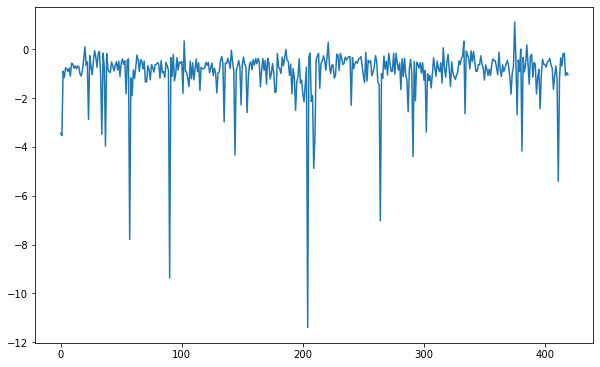

In [389]:
plt.plot(a)

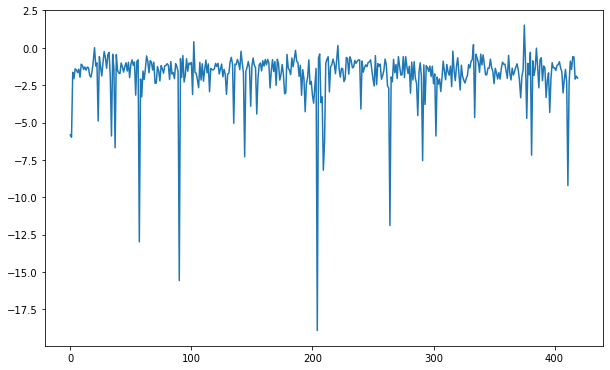

In [380]:
plt.plot(a)

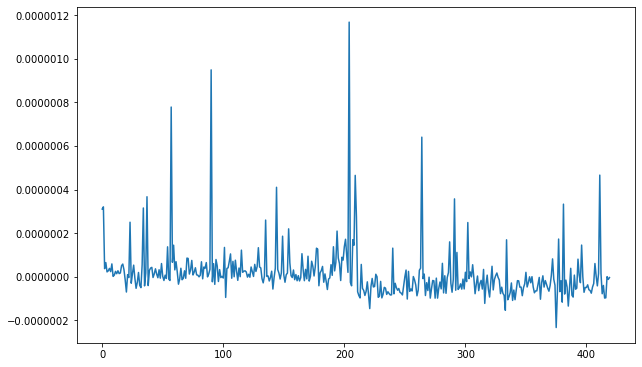

In [347]:
plt.plot(a - b*((a/b).mean()))
# plt.plot(a)

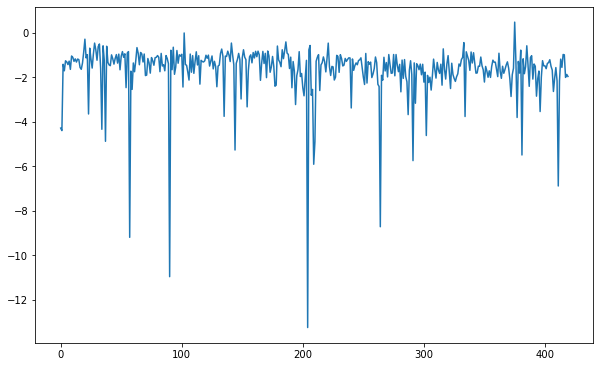

In [340]:
plt.plot(a)

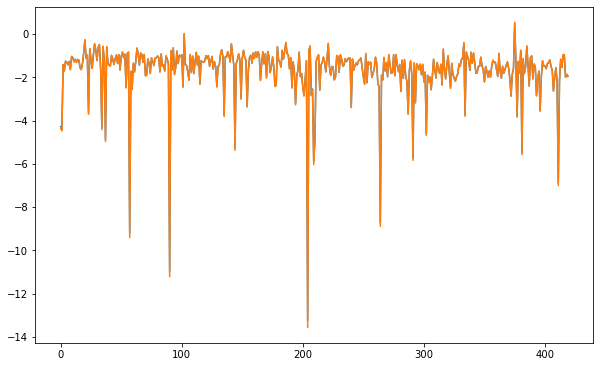

In [341]:
plt.plot(a)
plt.plot(b*((a/b).mean()))
# plt.plot(a)

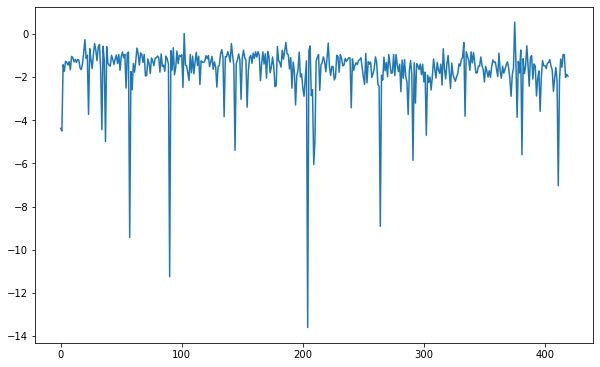

In [321]:
plt.plot(b)

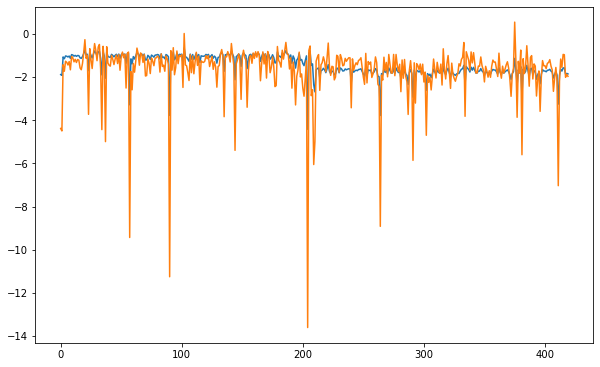

In [280]:
plt.plot(a)
plt.plot(b)

In [ ]:
from cvxopt import matrix, solvers
Q = 2*matrix(B_original)
p = matrix(np.zeros(420))
G = matrix(-A_original, (1,420))
# h = matrix(np.array([-0.01]), (1, 1), 'd')
h = matrix(-35.0)
A = matrix(np.array([A_prime, np.ones(420)]), (2,420))
b = matrix(np.array([-200, 0.0]), (2, 1), 'd')
sol=solvers.qp(Q, p, G, h, A, b)

In [239]:
A_original.dot(b)

35.99892216094365

In [229]:
A_prime.dot(x)

array([-100.])

In [139]:
( A_original.dot(np.linalg.inv(B_original)) )/ (-np.array(x)*1e6)

array([[8.97799554e-06, 9.22492610e-06, 2.54913593e-06, ...,
        3.28524085e-06, 2.98601815e-06, 3.18968193e-06],
       [8.92735727e-06, 9.17289508e-06, 2.53475812e-06, ...,
        3.26671122e-06, 2.96917622e-06, 3.17169128e-06],
       [8.93512002e-06, 9.18087133e-06, 2.53696221e-06, ...,
        3.26955177e-06, 2.97175805e-06, 3.17444921e-06],
       ...,
       [4.56120066e-06, 4.68665180e-06, 1.29506864e-06, ...,
        1.66904100e-06, 1.51702325e-06, 1.62049304e-06],
       [4.56107780e-06, 4.68652556e-06, 1.29503375e-06, ...,
        1.66899605e-06, 1.51698238e-06, 1.62044939e-06],
       [4.56215364e-06, 4.68763100e-06, 1.29533922e-06, ...,
        1.66938972e-06, 1.51734020e-06, 1.62083162e-06]])

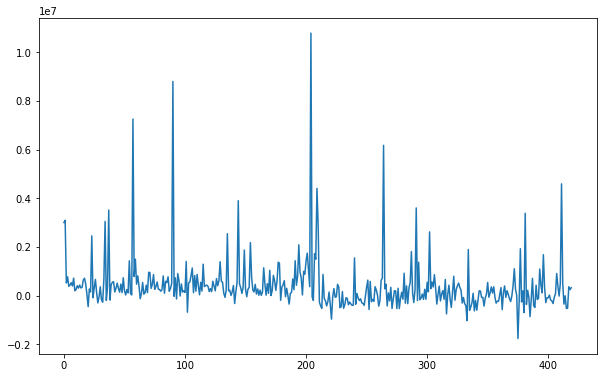

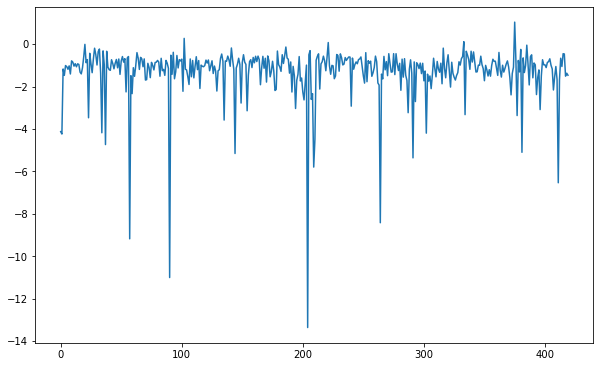

In [108]:
plt.plot(A_original.dot(np.linalg.inv(B_original)))

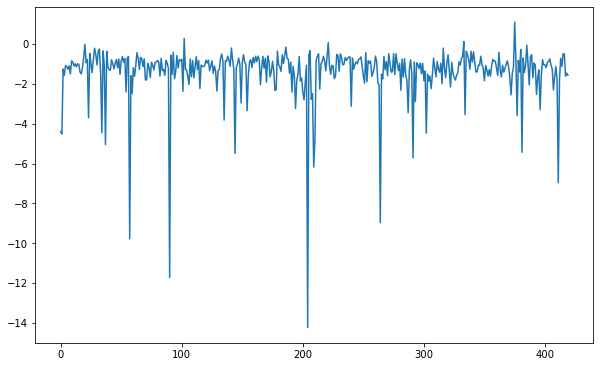

In [110]:
plt.plot(-np.array(x)*1e6)

In [111]:
( A_original.dot(np.linalg.inv(B_original)) )/ (-np.array(x)*1e6)

array([[0.93906888, 0.964897  , 0.26663125, ..., 0.34362541, 0.3123277 ,
        0.33363026],
       [0.91393211, 0.93906888, 0.25949413, ..., 0.33442733, 0.30396739,
        0.32469973],
       [3.30737804, 3.39834408, 0.93906888, ..., 1.21024046, 1.10001067,
        1.17503778],
       ...,
       [2.56631297, 2.63689678, 0.72865714, ..., 0.93906888, 0.85353764,
        0.91175386],
       [2.82347788, 2.90113474, 0.80167437, ..., 1.03317102, 0.93906888,
        1.00311883],
       [2.64319652, 2.71589494, 0.75048681, ..., 0.96720222, 0.87910857,
        0.93906888]])

In [121]:
(a/b).mean()

1.0648846163288084

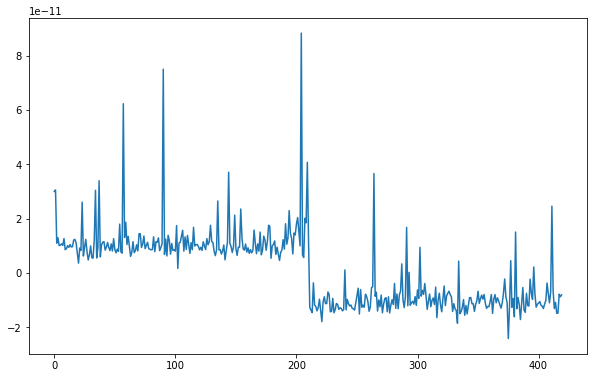

In [124]:
plt.plot(a - b*1.0648846163288084)
# plt.plot(b)

In [78]:
print(sol["x"])

[ 2.50e-01]
[ 7.50e-01]



In [38]:
B_original = B

In [46]:
B_only_diag = B * np.diag([1]* 420)

In [68]:
c = -200
cutoff = 400

B = B_only_diag
lamb, P = np.linalg.eig(B)
lamb, P = sort_eigenvalues_and_eigenvectors(lamb, P)
filtered_lamb = np.copy(lamb)
cutoff_mode = cutoff
filtered_B_inv, filtered_lamb, P = get_filtered_B_inv_lambda_and_P(filtered_lamb,
                                                                   cutoff_mode, P)
filtered_gamma = np.dot(filtered_B_inv, A)
filtered_B = np.linalg.inv(filtered_B_inv)

B_inv = filtered_B_inv
lambda_2 = (A_prime.dot(B_inv).dot(A) - c) / (A_prime.dot(B_inv).dot(A_prime))
gamma_new = B_inv.dot(A-A_prime*lambda_2)

gamma_B_diag = gamma_new

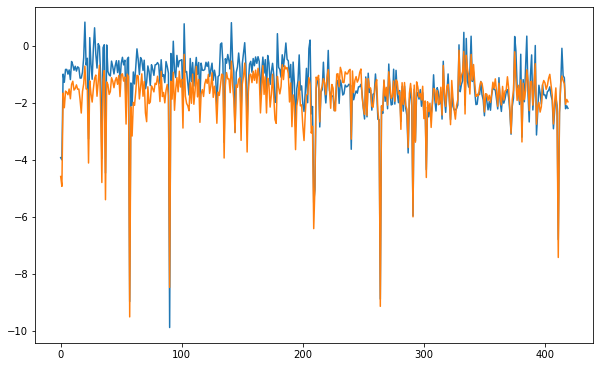

In [73]:
plt.plot(gamma_original_B)
plt.plot((gamma_B_diag))

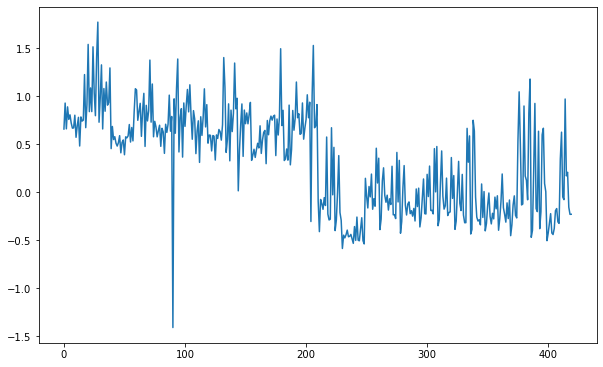

In [72]:
plt.plot(gamma_original_B - gamma_B_diag)
# plt.plot((gamma_B_diag))

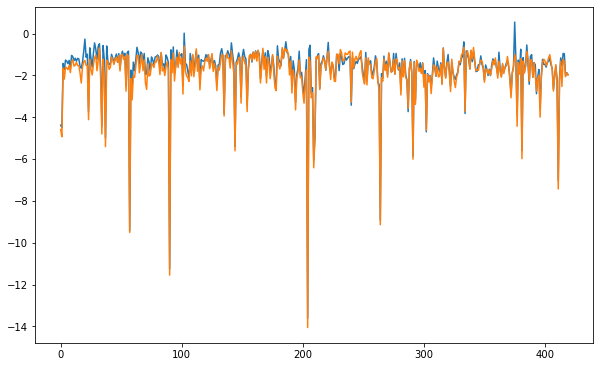

In [64]:
plt.plot(gamma_new)
plt.plot((gamma_B_diag))

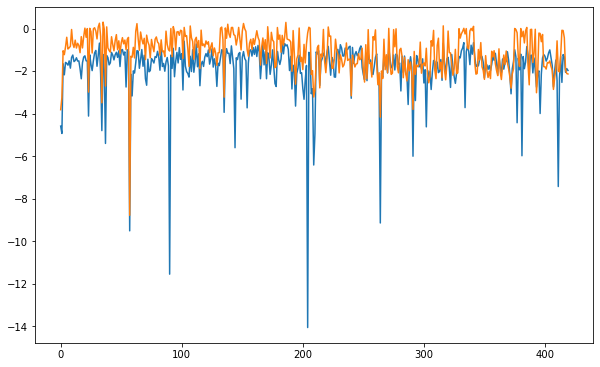

In [62]:
plt.plot(gamma_new)
plt.plot((-gamma))

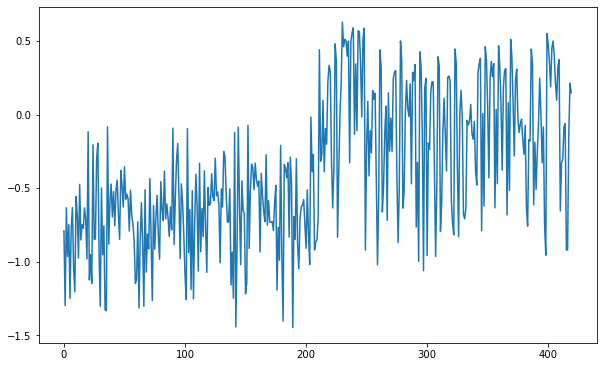

In [49]:
plt.plot(gamma_new- (-gamma))

In [31]:
B = np.loadtxt("/Users/weilu/Research/server/aug_2020/cluster20_shuffle_optimization/optimization_decoyN2000/combined_gammas/aug07_B")

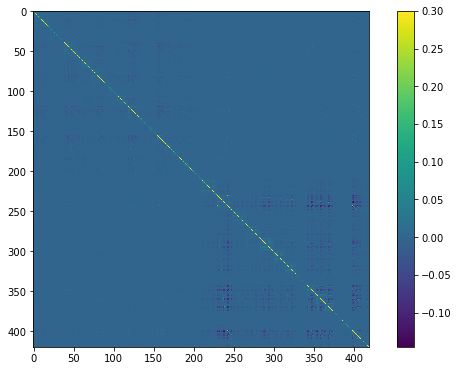

In [34]:
B[B>0.3]=0.3
plt.imshow(B)
plt.colorbar()

In [5]:
B = np.loadtxt("/Users/weilu/Research/server/aug_2020/curated_single_chain_optimization/optimization_decoyN2000/gammas/complete_protein_list_phi_gxxxg_v5_well420_B")

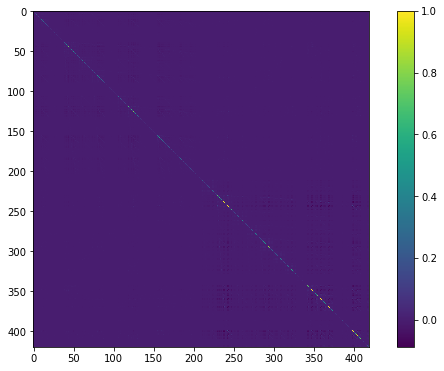

In [6]:
B[B>1]=1
plt.imshow(B)
plt.colorbar()

In [2]:
B = np.loadtxt("/Users/weilu/Research/server/jul_week1_2020/decoyN2000_gxxxg_shuffle_optimization/optimization_decoyN2000/gammas/filtered_protein_list_phi_gxxxg_v2_well126_B")

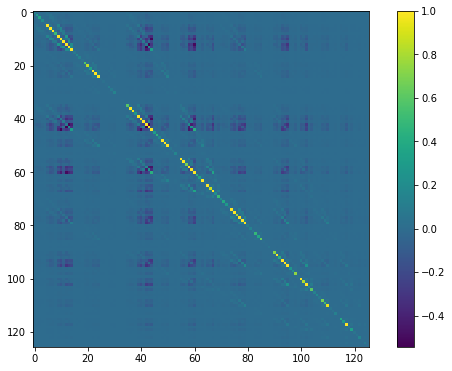

In [4]:
B[B>1]=1
plt.imshow(B)
plt.colorbar()